In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [30]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


- **Dependent Feature** : Salary
- **Independent Feature** : YearsExperience
- **Supervised Learning** : Labelled Data
- **Regression Problem** : Target Column is continuous numerical

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [32]:
# Check for duplicates
df.duplicated().sum()

0

In [33]:
# Check for missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

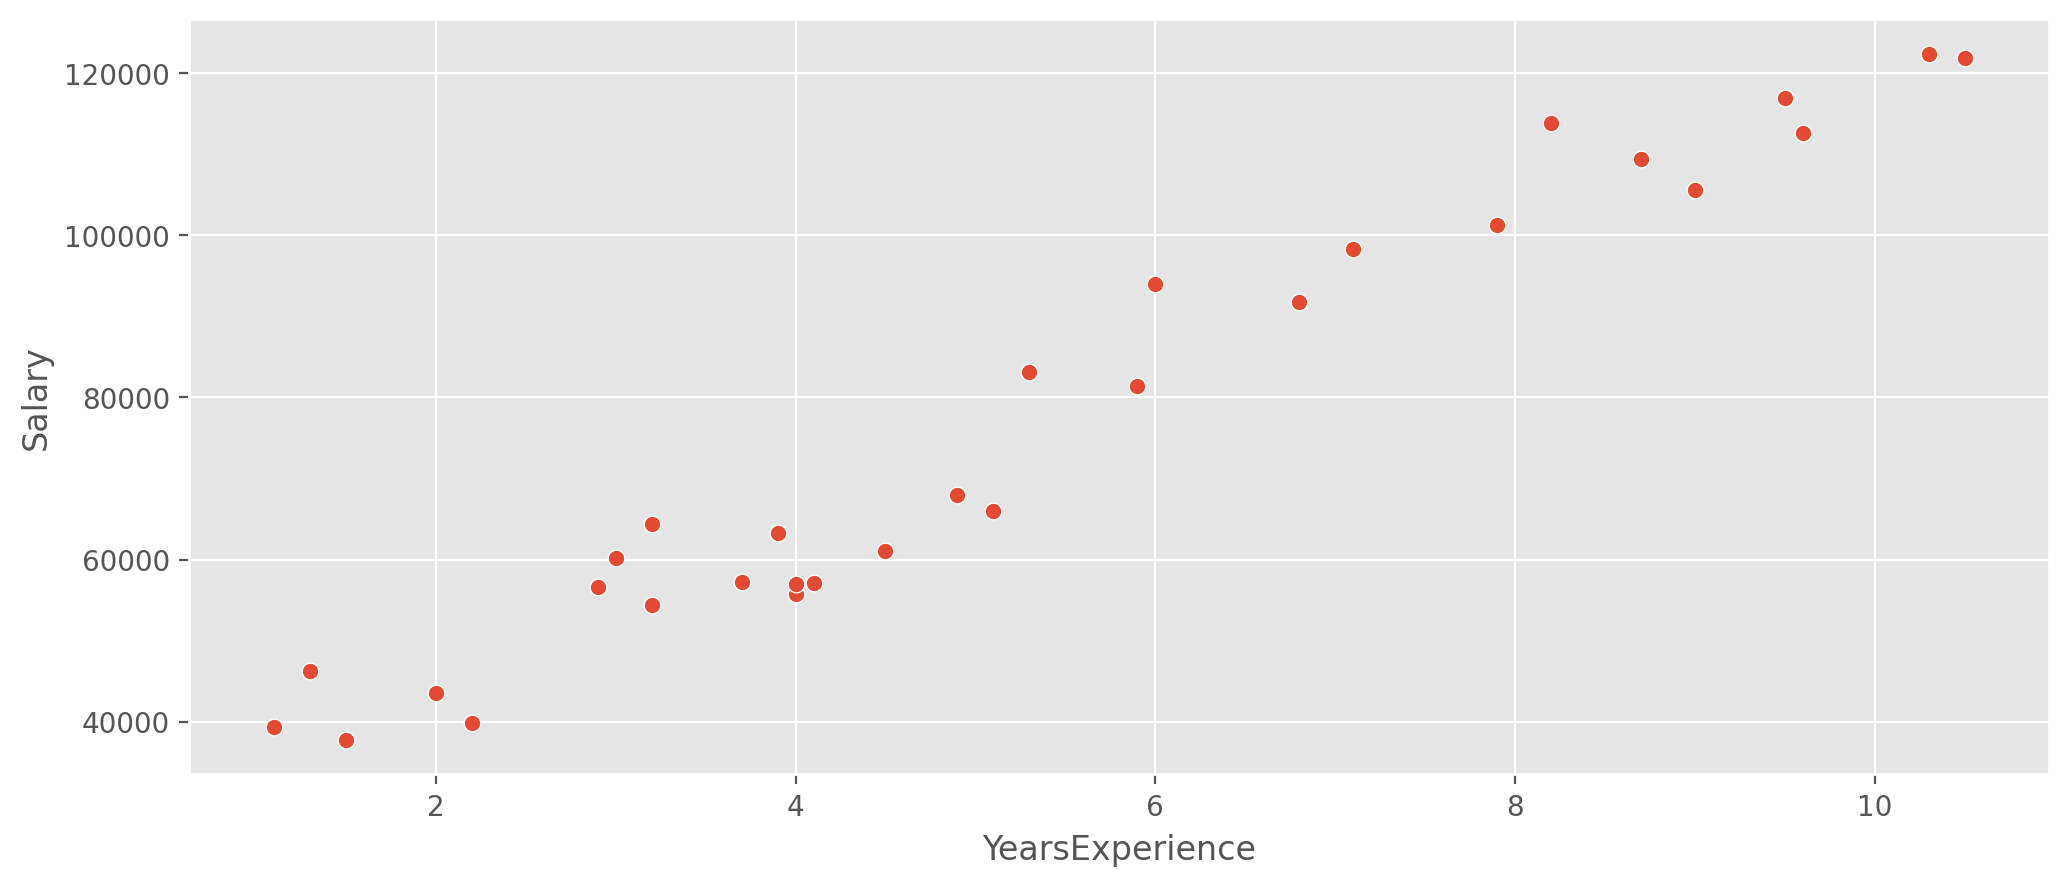

In [34]:
# Checking the relationship between YearsExperience and Salary
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('YearsExperience', 'Salary', data = df)

---
- Only one independent feature
- Relationship between dependent and independent feature is linear
- Simple linear regression is a suitable algorithm

<AxesSubplot:ylabel='YearsExperience'>

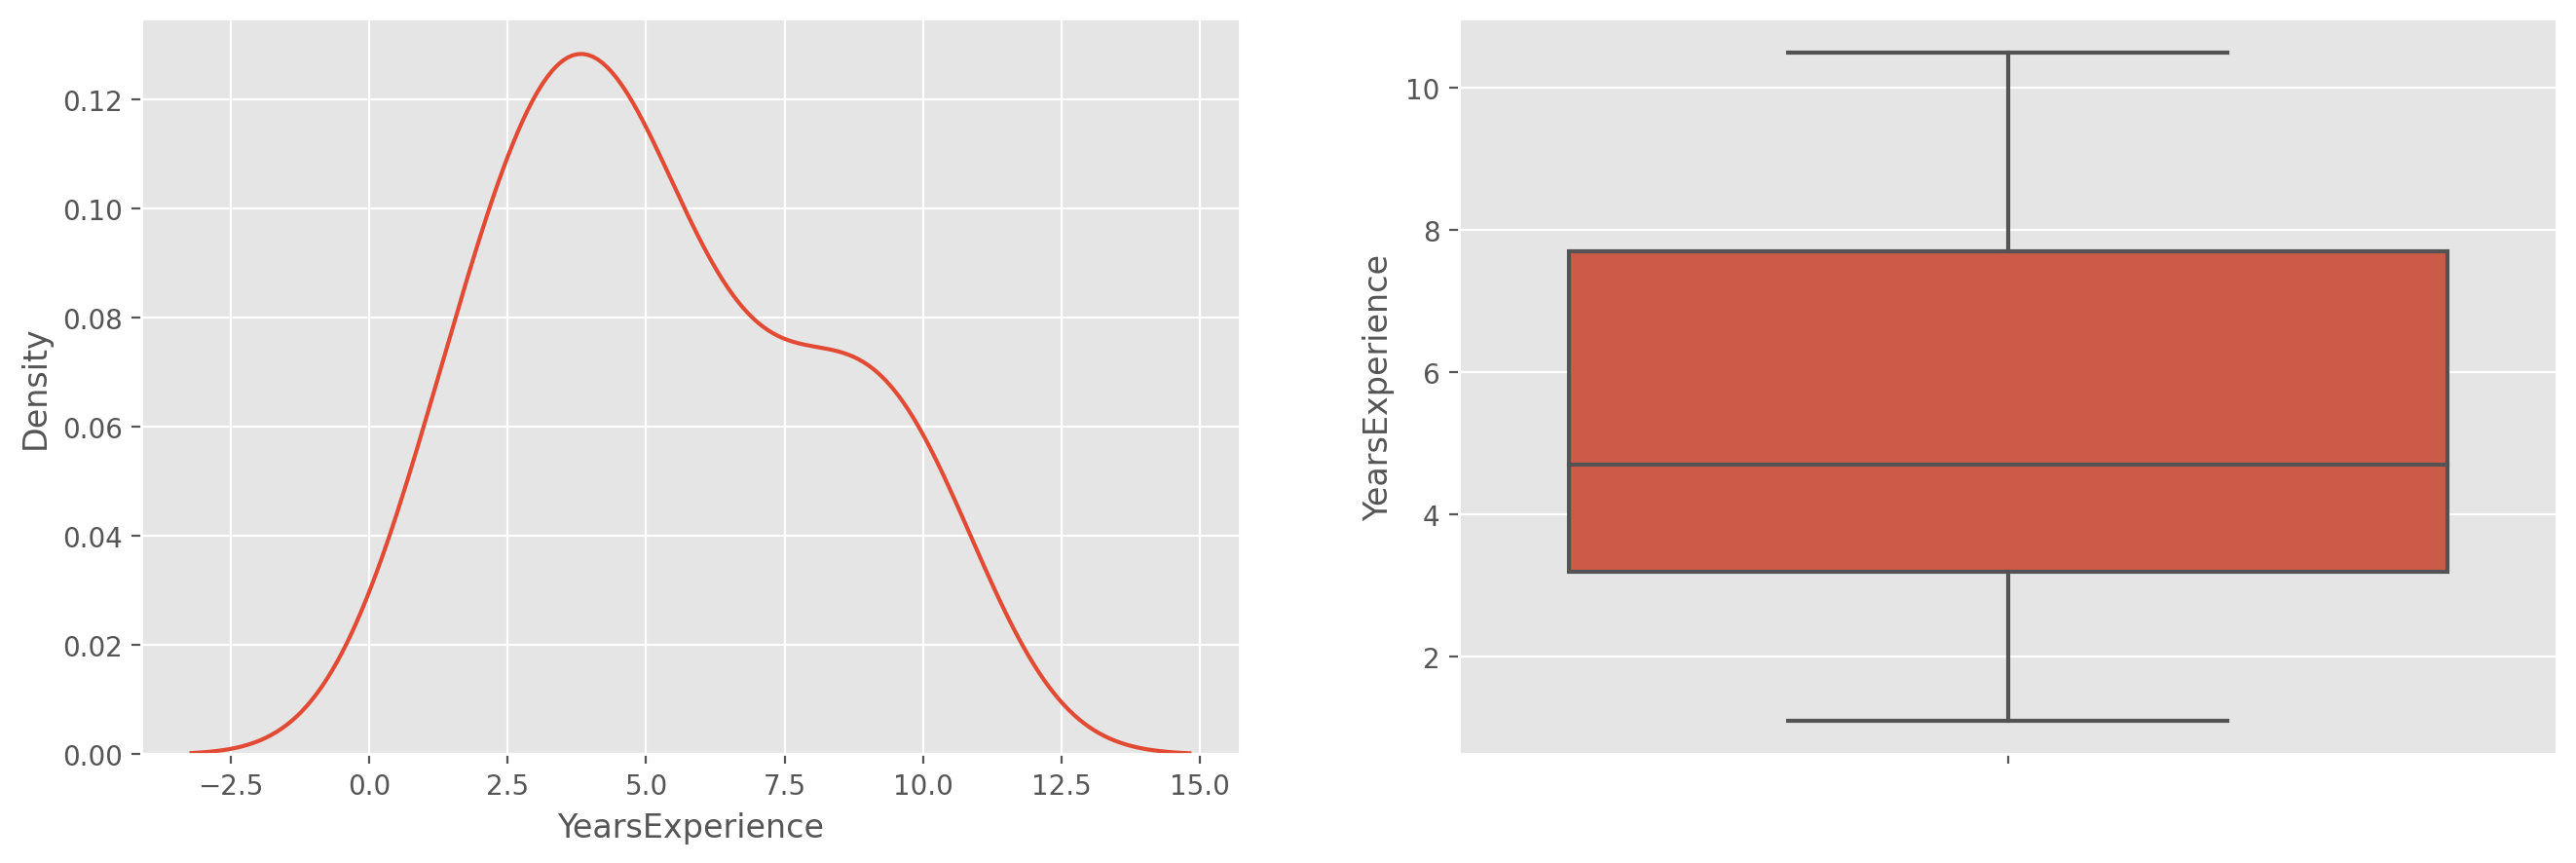

In [35]:
# YearsExperience
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['YearsExperience'])

<AxesSubplot:ylabel='Salary'>

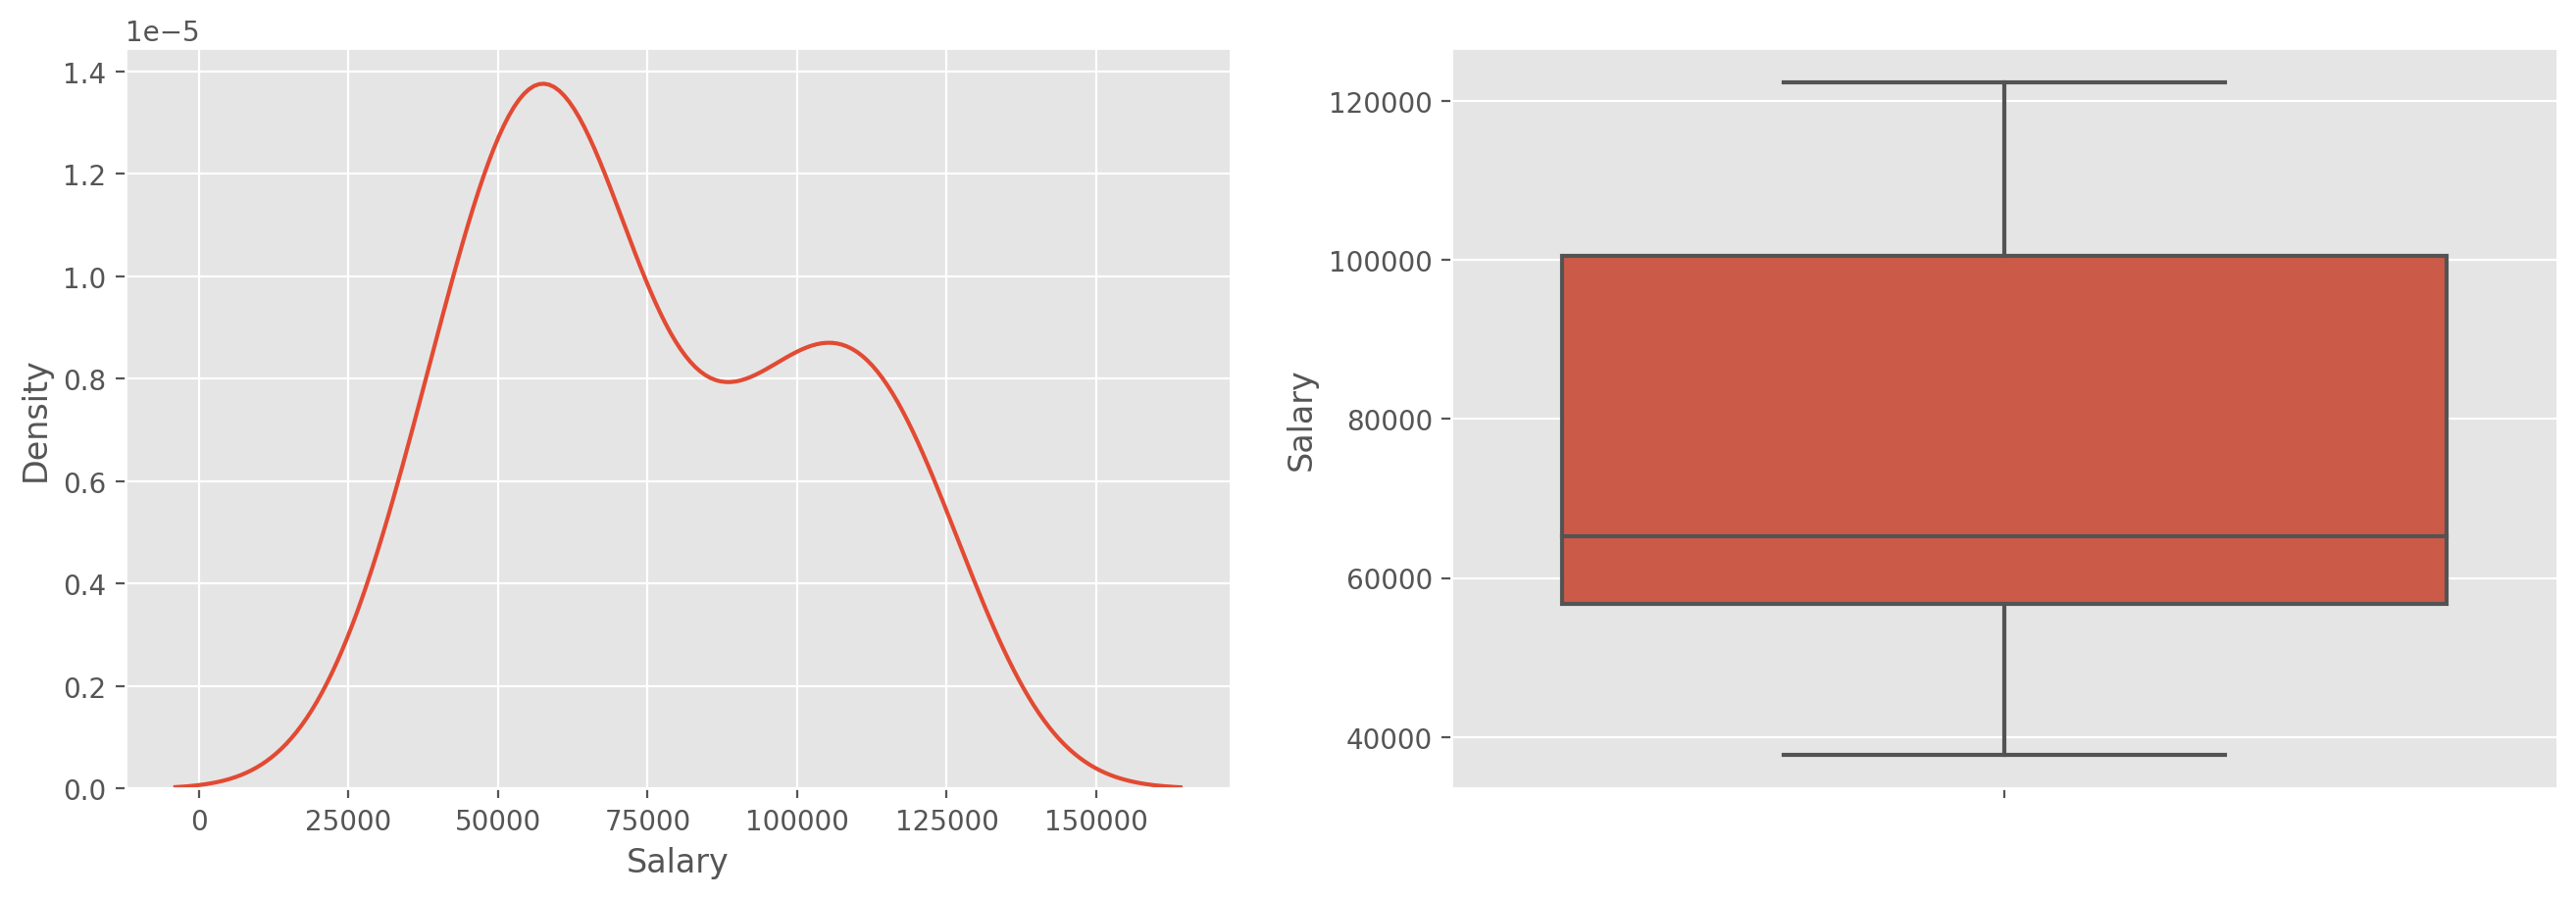

In [36]:
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(df['Salary'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['Salary'])

---

In [37]:
X = df[['YearsExperience']].values
Y = df[['Salary']].values

In [38]:
print('Independent Feature Shape : ', X.shape)
print('Dependent Feature Shape   : ', Y.shape)

Independent Feature Shape :  (30, 1)
Dependent Feature Shape   :  (30, 1)


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 5)

In [40]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labesls Shape : ', y_test.shape)

Training Data Shape   :  (22, 1)
Training Labels Shape :  (22, 1)
Testing Data Shape    :  (8, 1)
Testing Labesls Shape :  (8, 1)


---
## Training the model

- **Y' = B0 + B1*X**
- Y' : Predictions
- X  : Input
- B0 : Intercept
- B1 : Coefficinet

In [42]:
# Ordinary Least Squares (OLS)
from sklearn.linear_model import LinearRegression           # Import the class
regressor = LinearRegression()                              # Create an object
regressor.fit(x_train, y_train)                             # Fit the object to training data

LinearRegression()

In [43]:
regressor.intercept_

array([27048.91343091])

In [44]:
regressor.coef_

array([[9337.14073482]])

---
- **Y' = B0 + B1*X**
- Y' = 27048.91 + 9337.14*X

In [56]:
regressor.predict([[10]])

array([[120420.32077908]])

In [57]:
27048.91 + 9337.14*10

120420.31

In [58]:
regressor.predict(x_test[:5])

array([[ 64397.47637018],
       [125088.89114649],
       [103613.46745641],
       [111083.18004426],
       [ 82138.04376633]])

In [59]:
regressor.predict([[11], [12], [15], [18]])

array([[129757.4615139 ],
       [139094.60224871],
       [167106.02445316],
       [195117.44665761]])

In [60]:
# Evaluation
print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.9560748883996936
Testing Set Score  :  0.9556640405326781


In [61]:
# The r2_score function
from sklearn.metrics import r2_score

pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.9560748883996936
Testing Set Score  :  0.9556640405326781


---
## Visualizing the fit

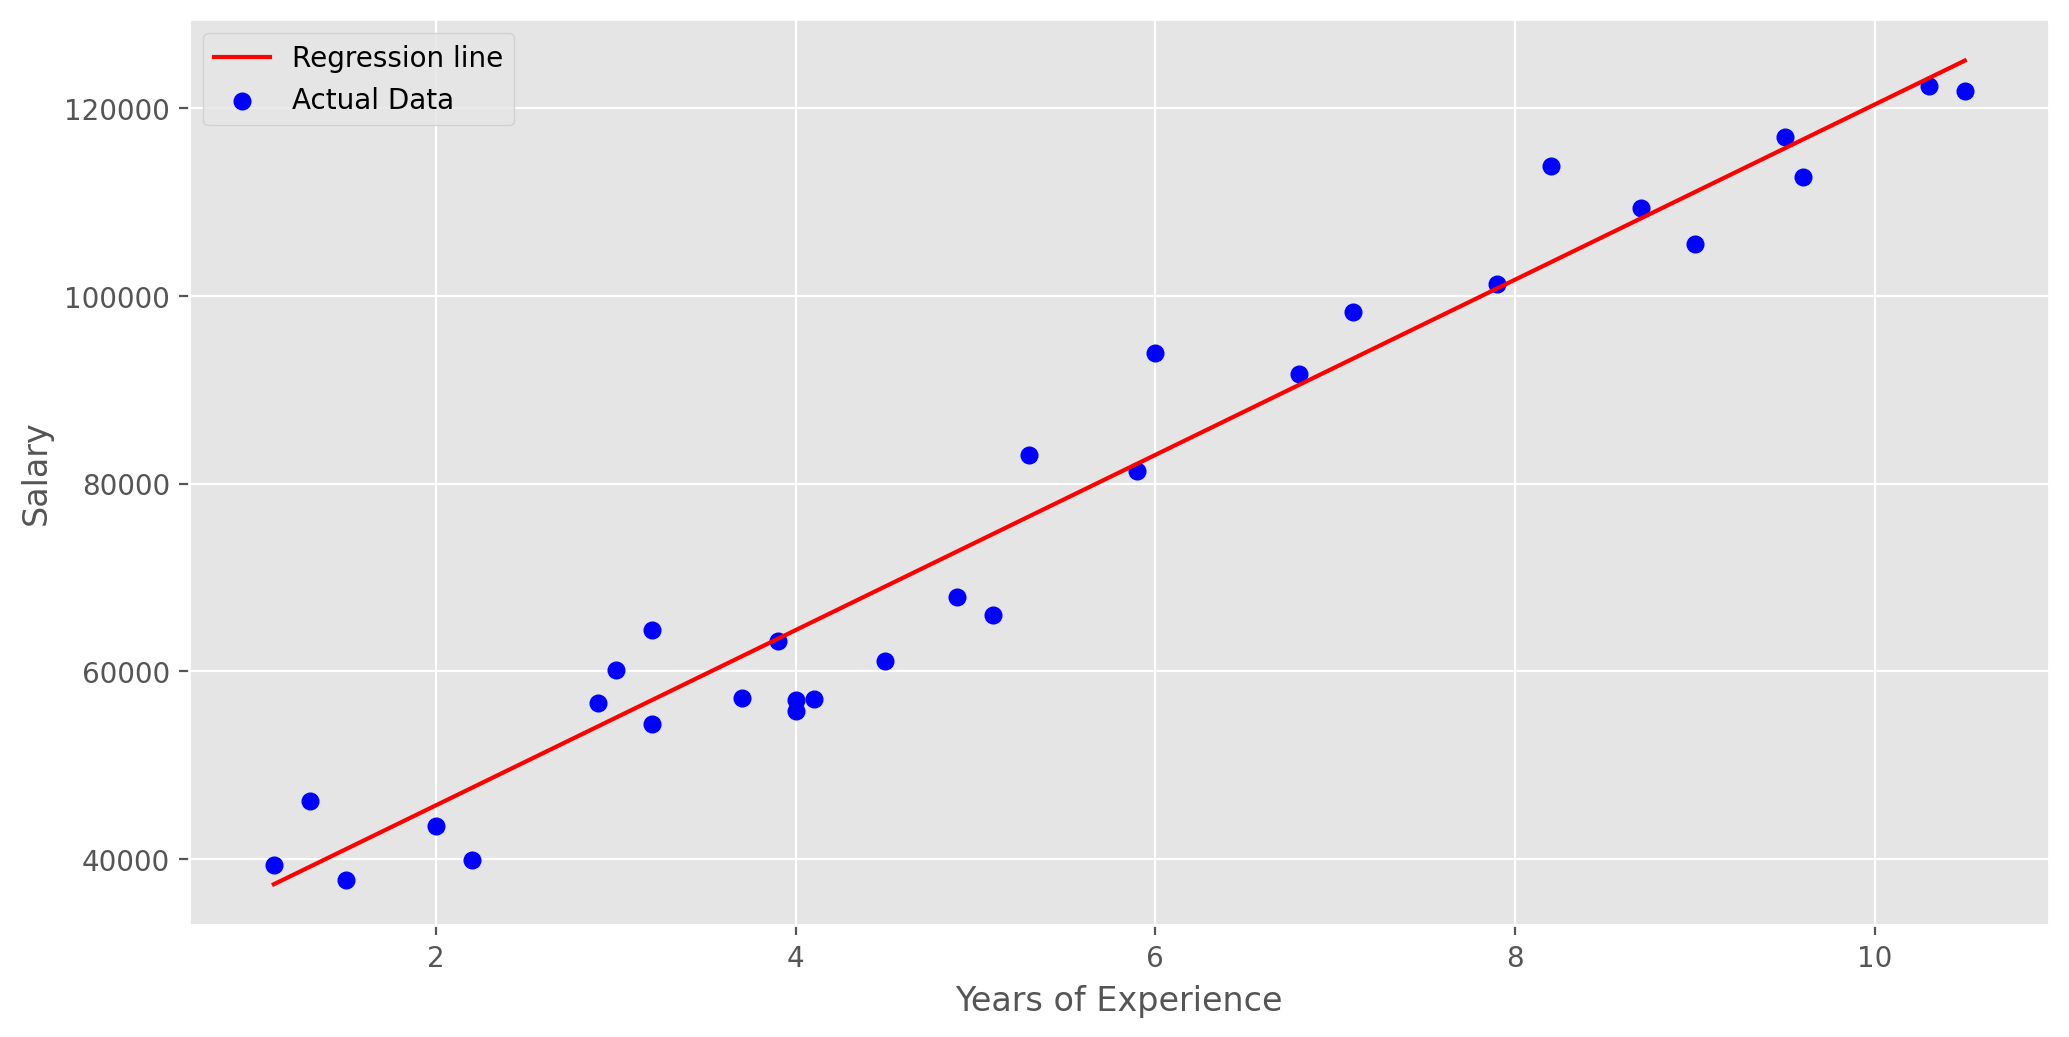

In [79]:
pred = regressor.predict(X)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, color = 'blue', label = 'Actual Data')
plt.plot(X, pred, color = 'red', label = 'Regression line')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

---
# ==================================================

In [71]:
# Gradient Descent method
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(alpha = 0.001)
sgd_regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.001)

In [72]:
sgd_regressor.intercept_          # B0

array([23069.15905955])

In [73]:
sgd_regressor.coef_               # B1

array([9943.58780226])

In [74]:
sgd_regressor.predict([[10]])

array([122505.03708213])

In [75]:
19534.66 + 10512.45 * 10

124659.16

In [76]:
# Evaluation
print('Training Set Score : ', sgd_regressor.score(x_train, y_train))
print('Testing Set Score  : ', sgd_regressor.score(x_test, y_test))

Training Set Score :  0.9508895979849804
Testing Set Score  :  0.9610303872742272


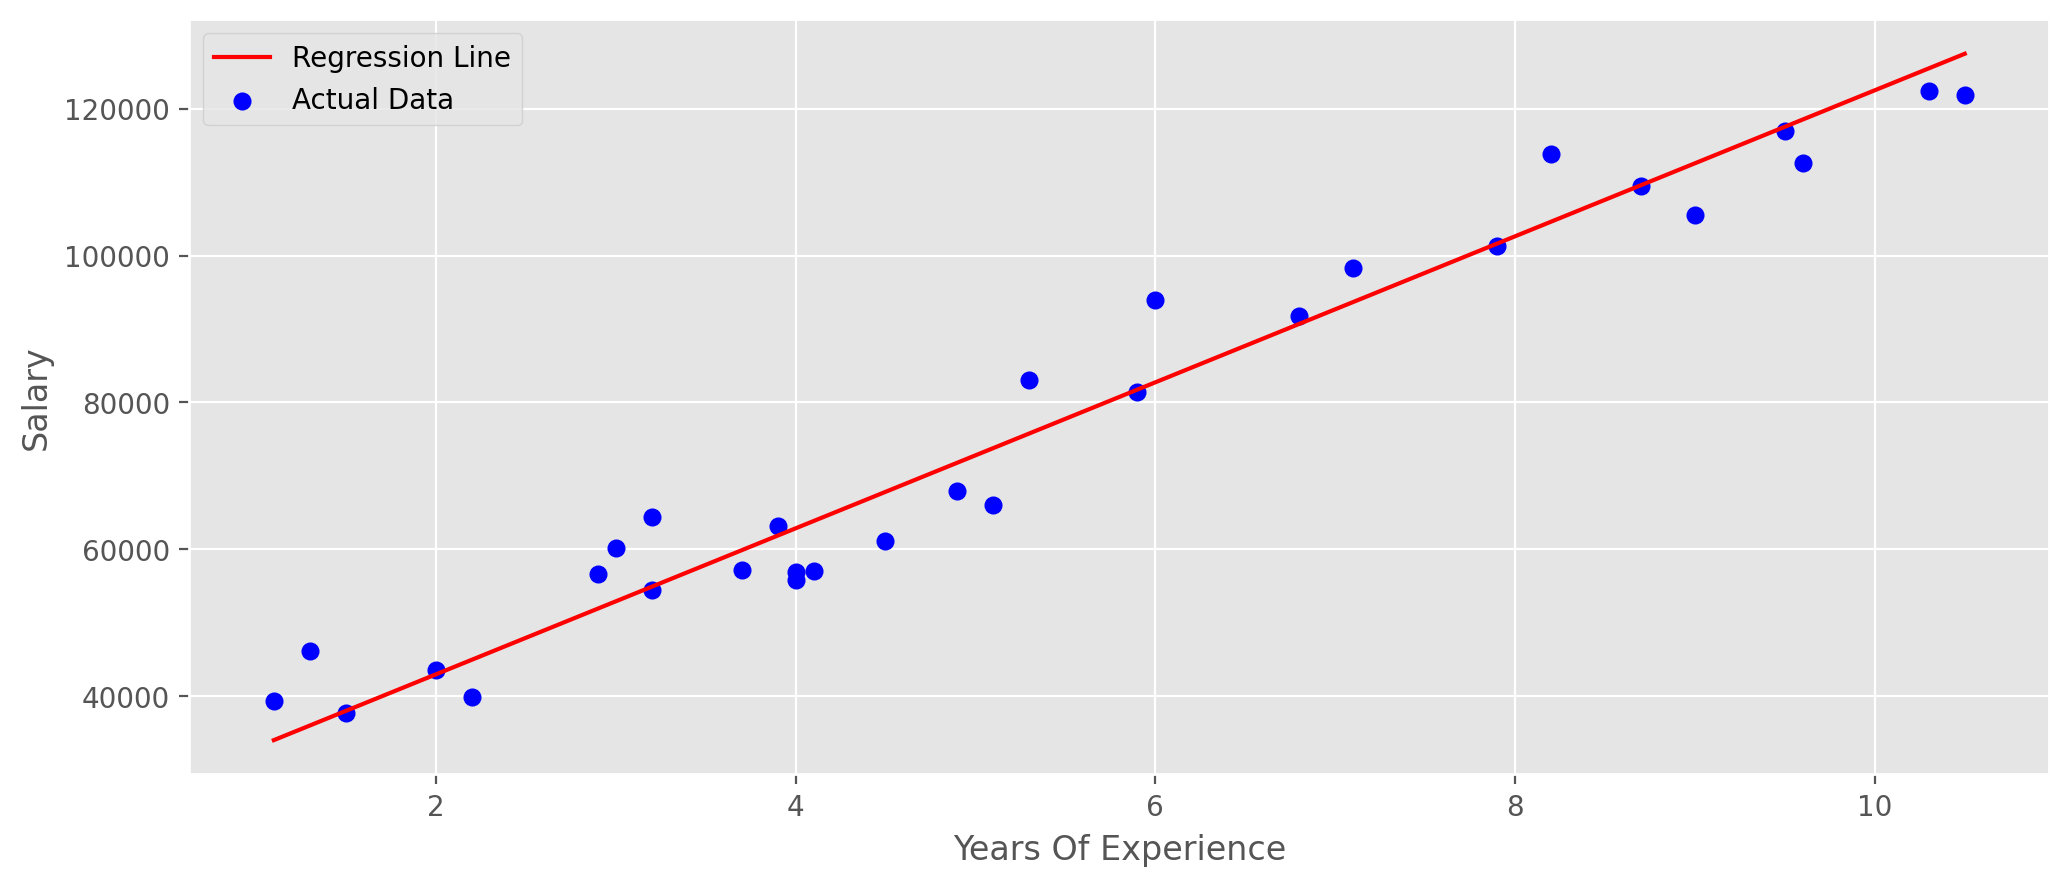

In [78]:
pred = sgd_regressor.predict(X)

plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(X, Y, color = 'blue', label = 'Actual Data')
plt.plot(X, pred, color = 'red', label = 'Regression Line')

plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.legend()